# Cho bộ dữ liệu ở đường link: https://drive.google.com/file/d/1-xM3vbO5D9sO71Ord2ip6UVzevdyhdKs/ 
## Hãy thực hiện các yêu cầu sau:

Bộ dữ liệu "seeds" (hạt giống) gồm thông tin về các đặc điểm hình thái của hạt giống từ ba giống lúa mì khác nhau.

`xây dựng một mô hình phân lớp để dự đoán giống lúa mì dựa trên các đặc trưng đã cho.`

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import scikitplot as skplt

import warnings
import joblib
import os

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier


# Tắt cảnh báo FutureWarning cho is_categorical_dtype
warnings.simplefilter(action='ignore', category=FutureWarning)
# tắt cảnh báo UserWarning
warnings.simplefilter(action='ignore', category=UserWarning)
# tắt cảnh báo sklearn
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

- Đọc data: <br>
Có các cột trong data như sau:
    - `area`: Diện tích của hạt giống.
    - `perimeter`: Chu vi của hạt giống.
    - `compactness`: Độ dày của hạt giống.
    - `lengthOfKernel`: Chiều dài của hạt giống.
    - `widthOfKernel`: Chiều rộng của hạt giống.
    - `asymmetryCoefficient`: Hệ số bất đối xứng.
    - `lengthOfKernelGroove`: Chiều dài của rãnh hạt giống.
    - `seedType`: Loại hạt giống.

In [3]:
# Column names
column_names = ['area','perimeter','compactness','lengthOfKernel','widthOfKernel','asymmetryCoefficient',
                      'lengthOfKernelGroove','seedType']

# Read the dataset
df = pd.read_csv('data/seeds_dataset.txt', delim_whitespace = True, header = None, names = column_names)

df.head()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


### 1. Sử dụng thống kê mô tả, mô tả về bộ dữ liệu trên


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   area                  210 non-null    float64
 1   perimeter             210 non-null    float64
 2   compactness           210 non-null    float64
 3   lengthOfKernel        210 non-null    float64
 4   widthOfKernel         210 non-null    float64
 5   asymmetryCoefficient  210 non-null    float64
 6   lengthOfKernelGroove  210 non-null    float64
 7   seedType              210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [11]:
df.describe()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


### 2. Trực quan hóa dữ liệu với các biểu đồ box, histogram, scatter matrix, grid line

In [12]:
# Set the style for better visualization
sns.set(style="whitegrid")

- Biểu đồ box

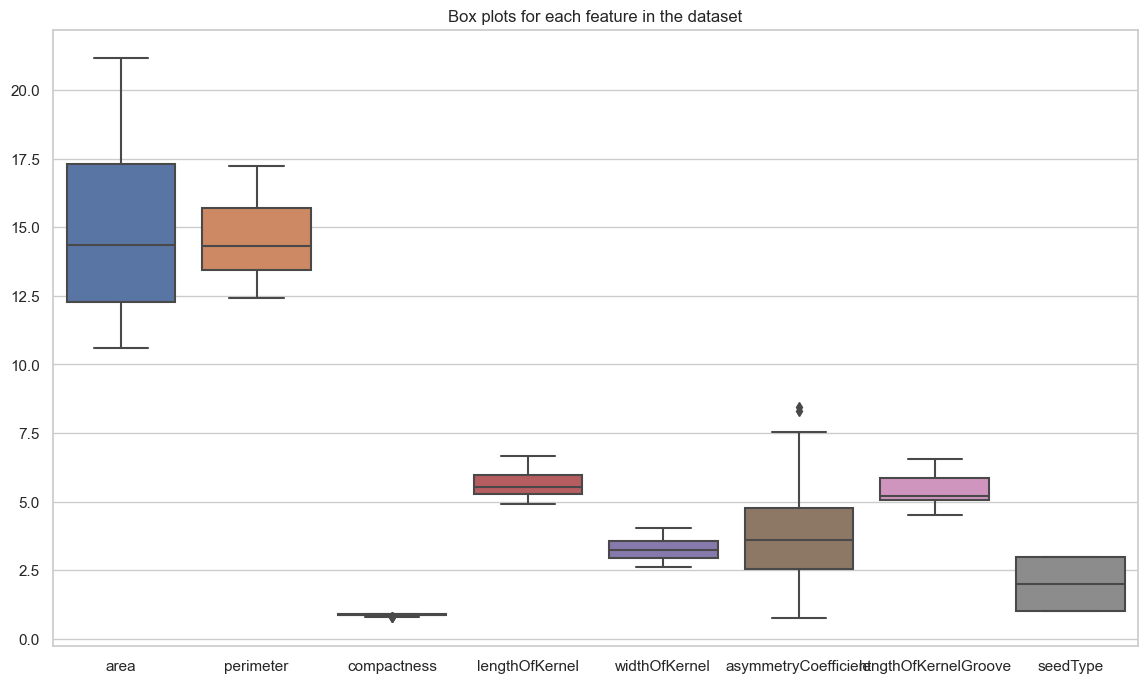

In [13]:
plt.figure(figsize=(14, 8)) # Set the size of the plot

# Plotting the boxplot for each feature
# sns.boxplot(data=df.drop(columns=['Target']))
sns.boxplot(data=df)

plt.title("Box plots for each feature in the dataset")
plt.show()

- Biểu đồ histogram

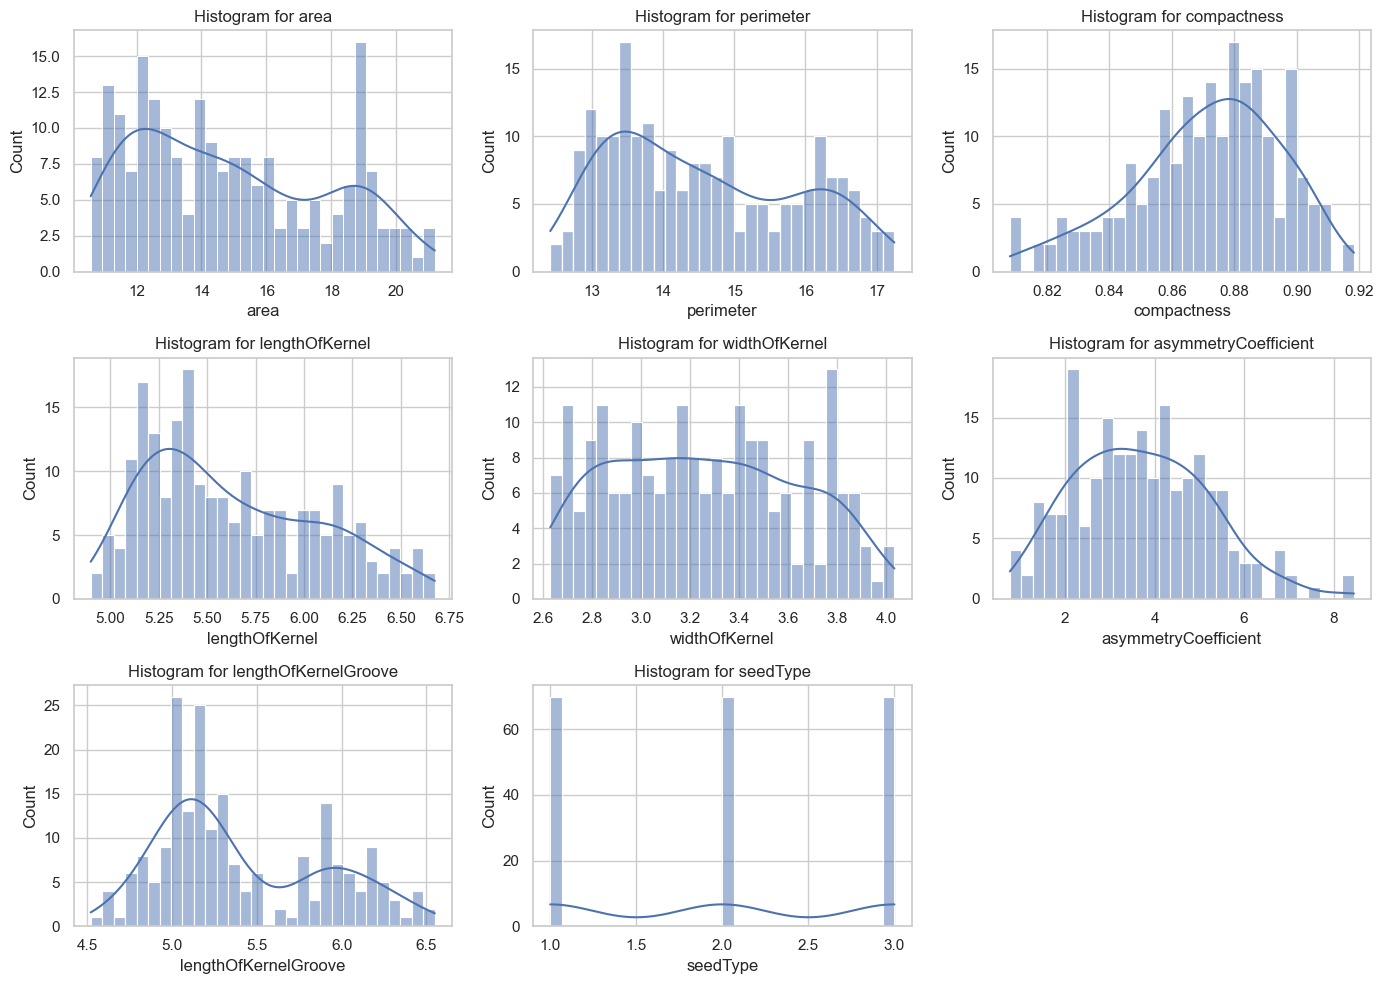

In [14]:
plt.figure(figsize=(14, 10))

# Iterate through each feature to plot separate histograms
for i, column in enumerate(df.columns, 1):  # Starting the enumeration from 1 for subplot indexing
    plt.subplot(3, 3, i)  # Adjust depending on the number of features; here it's set for up to 9 features/columns
    sns.histplot(df[column], bins=30, kde=True)  # 'bins' control the number of bins, and 'kde' adds a density curve
    plt.title(f'Histogram for {column}')
    plt.tight_layout()  # Ensures plots do not overlap

plt.show()


- Scatter matrix

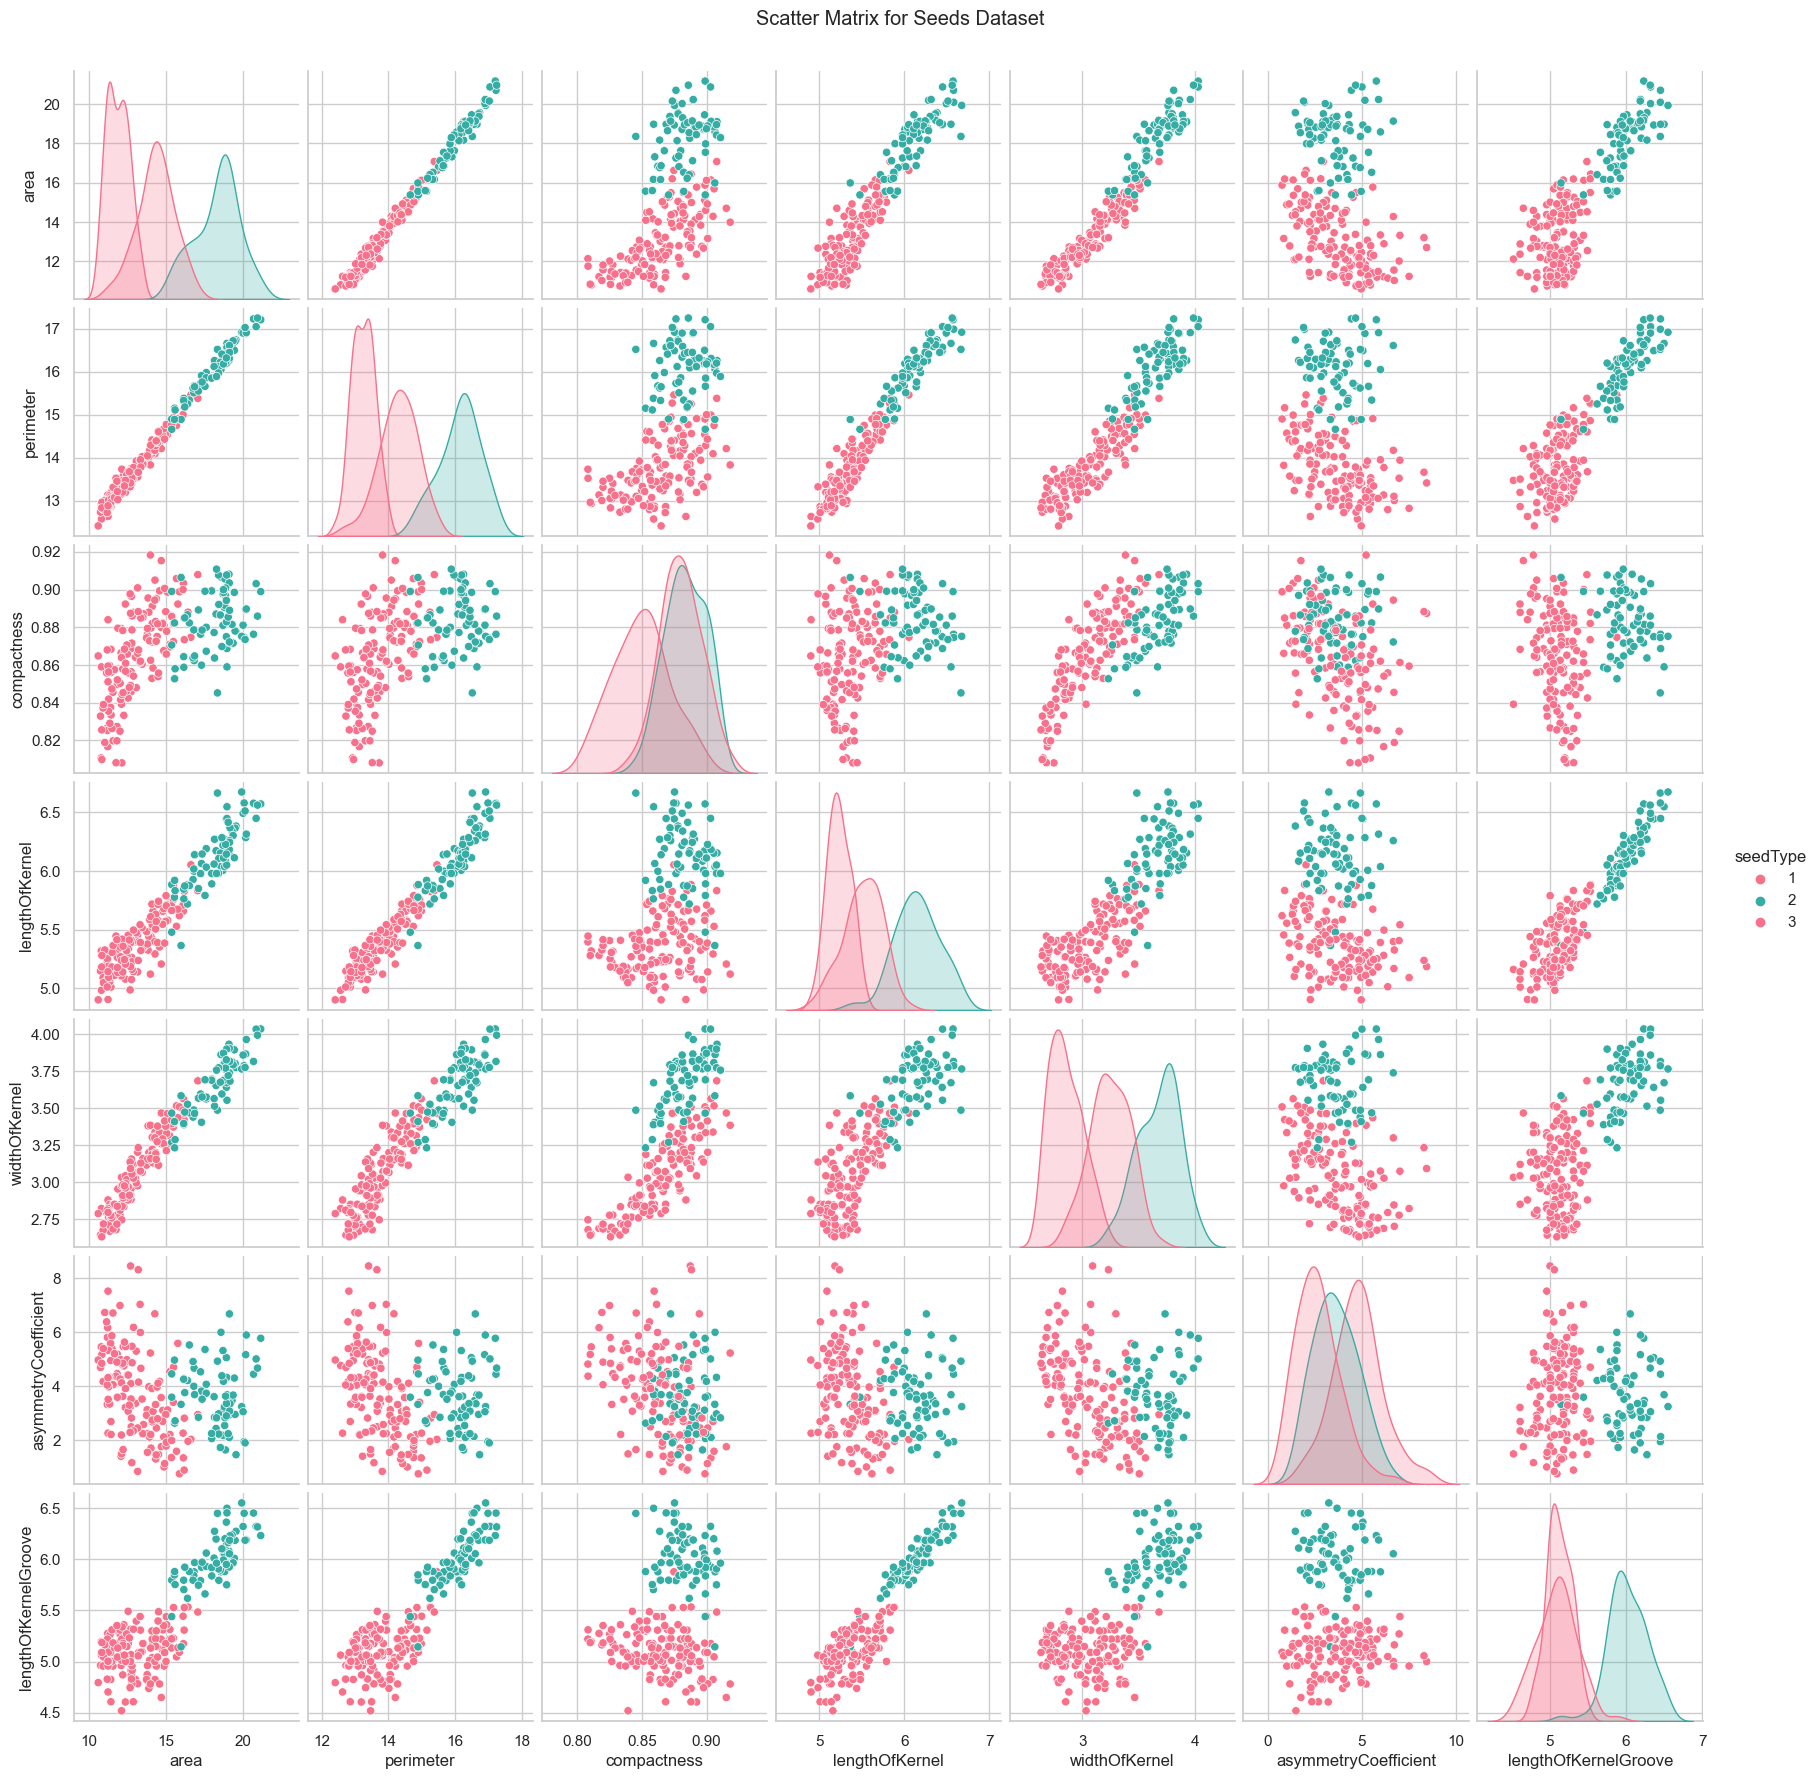

In [15]:
# Create a pair plot (scatter matrix)
g = sns.pairplot(df, hue="seedType", palette="husl")  # Sử dụng cột 'Target' để mô tả màu sắc cho từng điểm dữ liệu

g.fig.suptitle("Scatter Matrix for Seeds Dataset", y=1.02)

plt.show()

- Grid line

In [16]:
plt.rcParams["axes.grid"] = True

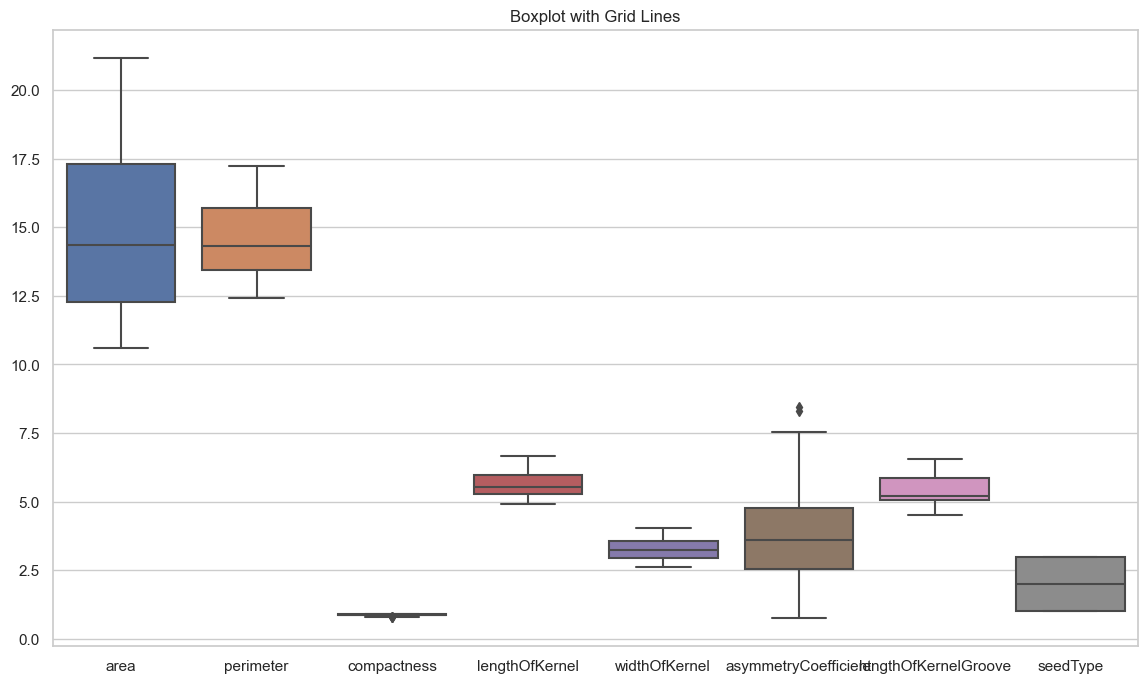

In [18]:
plt.figure(figsize=(14, 8)) 
sns.boxplot(data=df)
plt.title("Boxplot with Grid Lines")
plt.show()

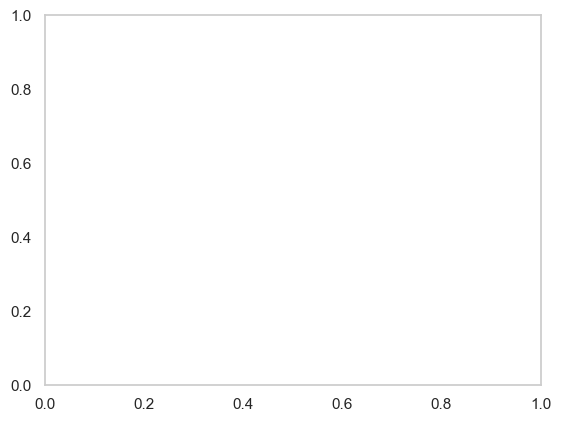

In [19]:
# Tắt grid lines
plt.grid(False)

### 3. Cho biết những dữ liệu còn thiếu và đề xuất cách xử lý dữ liệu thiếu đó

In [20]:
# Kiểm tra dữ liệu bị thiếu
missing_values = df.isnull().sum() 

# Tỉ lệ % các giá trị bị thiếu
percentage_missing = (missing_values/len(df))*100 

pd.DataFrame({'Missing_values': missing_values,'Percentage_missing': percentage_missing})

,Missing_values,Percentage_missing
area,0,0.0
perimeter,0,0.0
compactness,0,0.0
lengthOfKernel,0,0.0
widthOfKernel,0,0.0
asymmetryCoefficient,0,0.0
lengthOfKernelGroove,0,0.0
seedType,0,0.0


`Ta thấy dữ liệu không bị thiếu`

### 4. Chia bộ dữ liệu thành 2 phần Train/Test với các tỉ lệ nhất định

In [21]:
# chia dữ liệu thành 2 phần train và test
le = LabelEncoder()


X = df.drop('seedType', axis=1)
y = df['seedType']
y_label = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.3, random_state=42)
print("Shape X train: ",X_train.shape)
print("Shape X test: ",X_test.shape)
print("Shape y train:",y_train.shape)
print("Shape y test: ",y_test.shape)

Shape X train:  (147, 7)
Shape X test:  (63, 7)
Shape y train: (147,)
Shape y test:  (63,)


### 5. Đánh giá bộ dữ liệu với giải thuật KNN bằng phương pháp 10-Fold (k-fold)

In [22]:
k=10
knn = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
y_pre=knn.predict(X_test)
print(y_pre)

[0 2 1 0 2 2 0 2 0 2 1 2 2 1 0 1 0 0 2 1 1 0 2 1 1 2 0 1 0 2 2 2 1 0 1 0 2
 1 1 2 2 2 2 1 2 0 2 1 1 0 0 2 1 0 2 0 1 0 0 0 0 0 1]


In [23]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(knn, X, y_label, cv=kf, scoring='accuracy')
print("Scores: ",scores)

Scores:  [0.85714286 0.95238095 0.9047619  0.95238095 0.9047619  0.9047619
 0.85714286 1.         0.95238095 0.95238095]


In [24]:
print("Accuracy trung bình: ",np.mean(scores))

Accuracy trung bình:  0.9238095238095239


### 6. Huấn luyện dữ liệu cho bài toán phân lớp sử dụng với các giải thuật Decision Tree, Bayes, SVM và XGBoot.

In [25]:
def train_models(name_model,params,X_train,y_train):
    """
    Đối số:
        - name_model:gọi tên model cần train
        - params: Một dictionary chứa các siêu tham số
        - X_train,y_train:Dữ liệu huấn luyện, dùng để huấn luyện model
    Trả về:
        -clf.best_score : điểm số tốt nhất mà mô hình đạt được trong quá trình tinh chỉnh tham số.
        -clf.best_params: tập hợp các tham số tốt nhất mà mô hình đã sử dụng để đạt được clf.best_score
    """
    clf = GridSearchCV(name_model,params,n_jobs = 10,cv = 10,verbose=True)
    clf.fit(X_train,y_train)
    print("---------------------------")
    print("Best params:", clf.best_params_)
    print("Best score:", clf.best_score_)
    print("---------------------------")
    return clf


In [57]:
def evaluate_model_performance(model, X_train, y_train, X_test, y_test):
    """
    Đối số:
        - model: Mô hình đã huấn luyện
        - X_train, y_train: Dữ liệu huấn luyện
        - X_test, y_test: Dữ liệu kiểm tra
    """
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    f1_train = f1_score(y_train, y_train_pred,average='macro')
    f1_test = f1_score(y_test, y_test_pred,average='macro')

    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    conf_matrix_train = confusion_matrix(y_train, y_train_pred)
    conf_matrix_test = confusion_matrix(y_test, y_test_pred)

    print("F1 Score on Train:", f1_train)
    print("F1 Score on Test:", f1_test)
    print("Accuracy on Train:", accuracy_train)
    print("Accuracy on Test:", accuracy_test)
    print("Confusion Matrix on Train:\n", conf_matrix_train)
    print("Confusion Matrix on Test:\n", conf_matrix_test)


    print("\nClassification Report :")
    print(classification_report(y_test, y_test_pred))

    # Tạo figure và GridSpec layout
    fig = plt.figure(figsize=(14, 7))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], wspace=0.5)  # wspace để điều chỉnh khoảng cách giữa hai biểu đồ
    
    ax0 = plt.subplot(gs[0])
    skplt.metrics.plot_confusion_matrix(y_train, y_train_pred,
                                        normalize=True,
                                        title="Confusion Matrix on Train",
                                        cmap="Purples",
                                        ax=ax0)
    
    ax1 = plt.subplot(gs[1])
    skplt.metrics.plot_confusion_matrix(y_test, y_test_pred,
                                        normalize=False,
                                        title="Confusion Matrix on Test",
                                        cmap="Purples",
                                        ax=ax1)
    plt.show()

    return f1_train, f1_test, accuracy_train, accuracy_test, conf_matrix_train, conf_matrix_test

- Decision Tree

In [27]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['random', 'best'],
    'max_depth': [40, 50, 60, 70, 80, 90, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_model = DecisionTreeClassifier()
clf_dt = train_models(dt_model, param_grid, X_train,y_train)

Fitting 10 folds for each of 252 candidates, totalling 2520 fits
---------------------------
Best params: {'criterion': 'entropy', 'max_depth': 60, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
Best score: 0.9461904761904762
---------------------------


- Bayes 

In [28]:
gnb = GaussianNB()
gnb_params = {'var_smoothing': np.logspace(0,-9, num=100)}
clf_gnb  = train_models(gnb, gnb_params, X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
---------------------------
Best params: {'var_smoothing': 0.01519911082952933}
Best score: 0.9323809523809524
---------------------------


- SVM

In [29]:
svm = SVC()
svm_params = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['sigmoid','linear','rbf','poly']}

clf_svm = train_models(svm,svm_params,X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
---------------------------
Best params: {'C': 100, 'gamma': 1, 'kernel': 'linear'}
Best score: 0.9595238095238097
---------------------------


- XGBoot

In [30]:
xgb = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
xgb_params = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

clf_xgb = train_models(xgb,xgb_params,X_train,y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits
---------------------------
Best params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best score: 0.9323809523809524
---------------------------


### 7, 8, 9 Tính độ đo F1 score, Tính độ đo Accuracy, Tính độ đo Confusion Matrix

- Decision Tree

F1 Score on Train: 0.9731428441534824
F1 Score on Test: 0.8293854293854294
Accuracy on Train: 0.9727891156462585
Accuracy on Test: 0.8253968253968254
Confusion Matrix on Train:
 [[50  0  0]
 [ 2 47  0]
 [ 2  0 46]]
Confusion Matrix on Test:
 [[17  0  3]
 [ 3 18  0]
 [ 5  0 17]]

Classification Report :
              precision    recall  f1-score   support

           0       0.68      0.85      0.76        20
           1       1.00      0.86      0.92        21
           2       0.85      0.77      0.81        22

    accuracy                           0.83        63
   macro avg       0.84      0.83      0.83        63
weighted avg       0.85      0.83      0.83        63



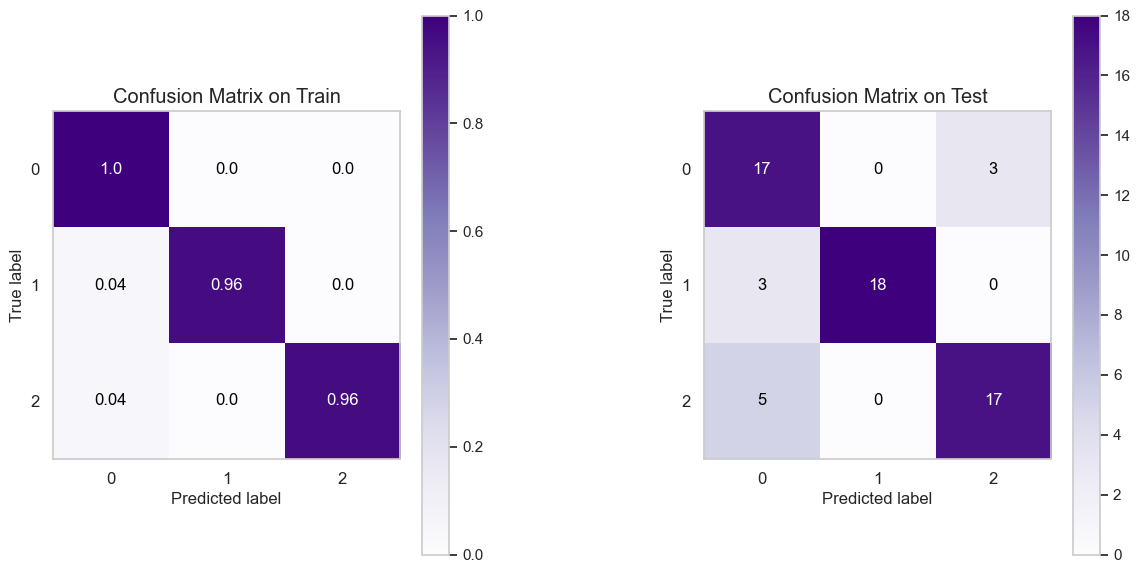

In [58]:
f1_train_dt, f1_test_dt, acc_train_dt, acc_test_dt, cm_train_dt, cm_test_dt = evaluate_model_performance(clf_dt, X_train, y_train, X_test, y_test)

- Bayes

F1 Score on Train: 0.9318197278911565
F1 Score on Test: 0.9193216948536098
Accuracy on Train: 0.9319727891156463
Accuracy on Test: 0.9206349206349206
Confusion Matrix on Train:
 [[44  2  4]
 [ 4 45  0]
 [ 0  0 48]]
Confusion Matrix on Test:
 [[17  0  3]
 [ 2 19  0]
 [ 0  0 22]]

Classification Report :
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        20
           1       1.00      0.90      0.95        21
           2       0.88      1.00      0.94        22

    accuracy                           0.92        63
   macro avg       0.92      0.92      0.92        63
weighted avg       0.92      0.92      0.92        63



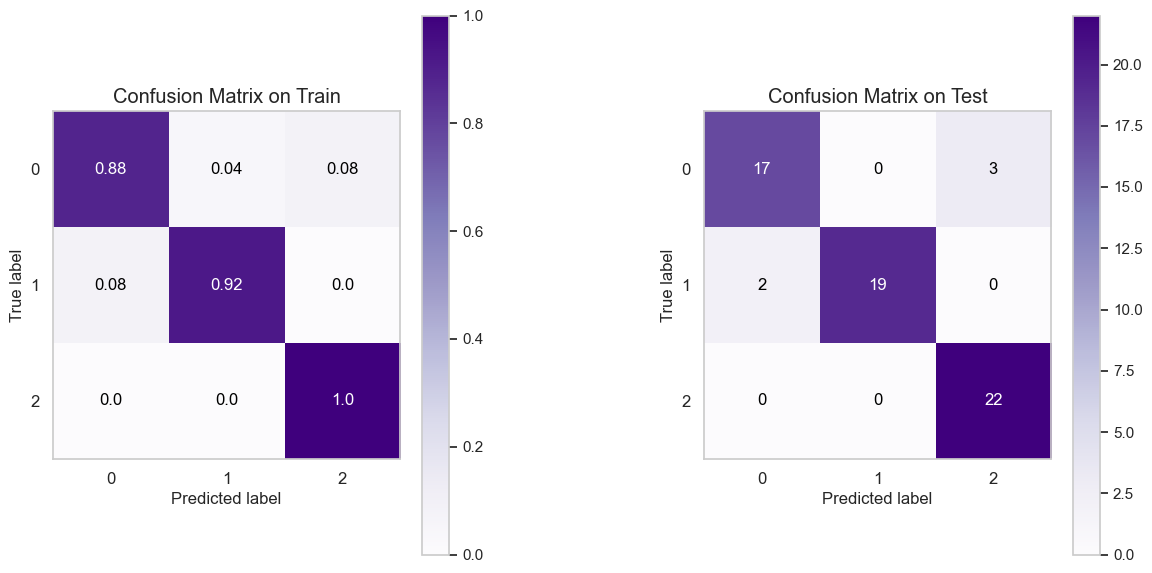

In [59]:
f1_train_gnb, f1_test_gnb, acc_train_gnb, acc_test_gnb, cm_train_gnb, cm_test_gnb=evaluate_model_performance(clf_gnb, X_train, y_train, X_test, y_test)

- SVM

F1 Score on Train: 0.9795897115484745
F1 Score on Test: 0.9521367521367522
Accuracy on Train: 0.9795918367346939
Accuracy on Test: 0.9523809523809523
Confusion Matrix on Train:
 [[48  0  2]
 [ 0 49  0]
 [ 1  0 47]]
Confusion Matrix on Test:
 [[18  0  2]
 [ 0 21  0]
 [ 1  0 21]]

Classification Report :
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       1.00      1.00      1.00        21
           2       0.91      0.95      0.93        22

    accuracy                           0.95        63
   macro avg       0.95      0.95      0.95        63
weighted avg       0.95      0.95      0.95        63



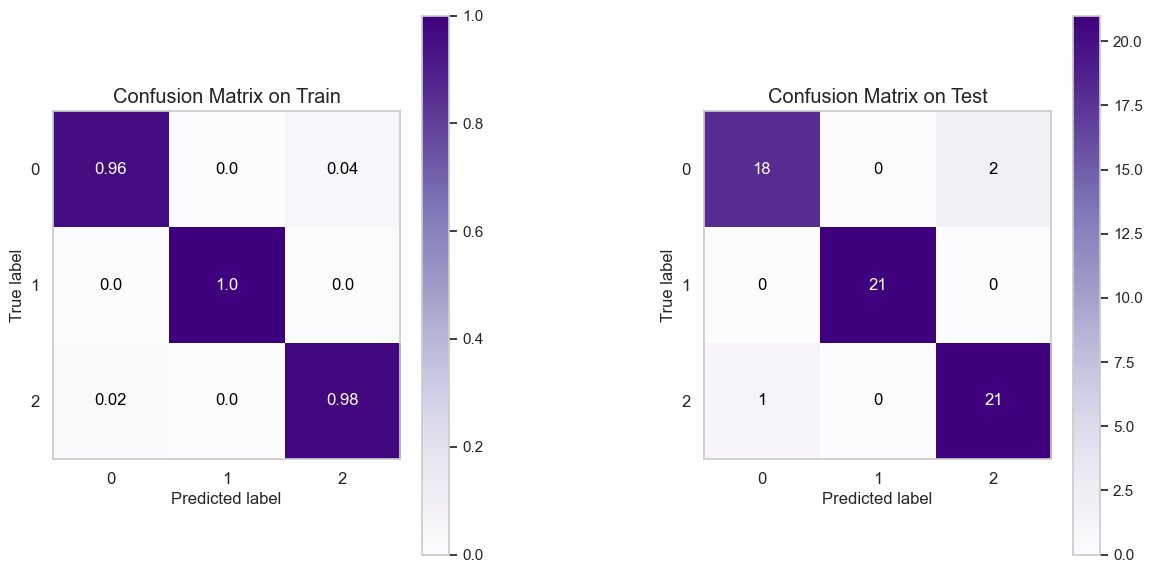

In [60]:
f1_train_svm, f1_test_svm, acc_train_svm, acc_test_svm, cm_train_svm, cm_test_svm=evaluate_model_performance(clf_svm, X_train, y_train, X_test, y_test)

- XGBoot

F1 Score on Train: 0.97978751688273
F1 Score on Test: 0.8743532889874354
Accuracy on Train: 0.9795918367346939
Accuracy on Test: 0.873015873015873
Confusion Matrix on Train:
 [[49  1  0]
 [ 1 48  0]
 [ 1  0 47]]
Confusion Matrix on Test:
 [[18  0  2]
 [ 1 20  0]
 [ 5  0 17]]

Classification Report :
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        20
           1       1.00      0.95      0.98        21
           2       0.89      0.77      0.83        22

    accuracy                           0.87        63
   macro avg       0.88      0.88      0.87        63
weighted avg       0.88      0.87      0.87        63



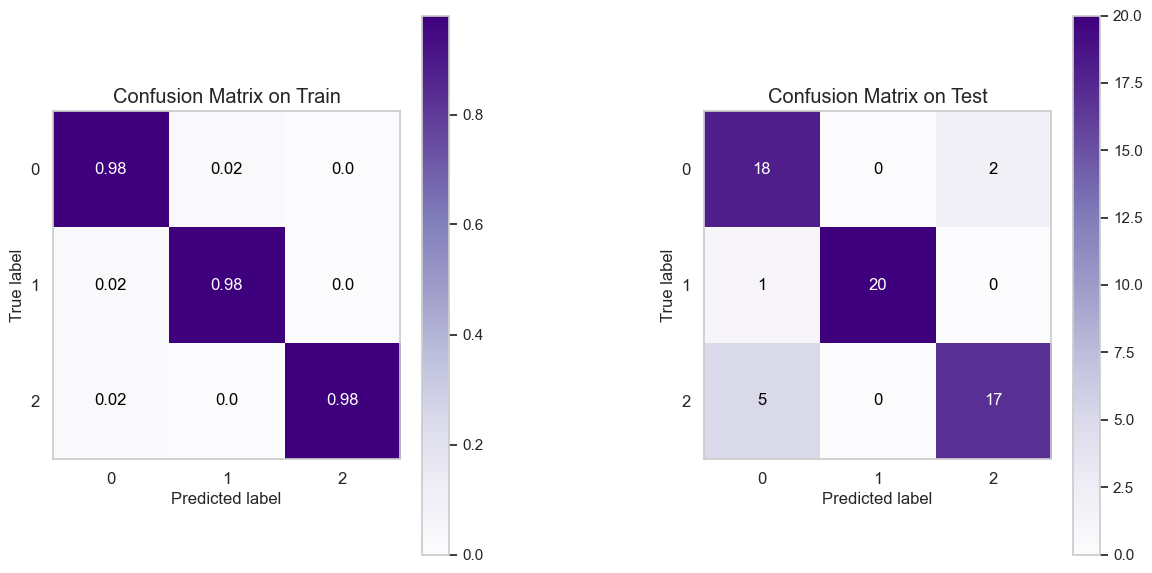

In [61]:
f1_train_xgb, f1_test_xgb, acc_train_xgb, acc_test_xgb, cm_train_xgb, cm_test_xgb=evaluate_model_performance(clf_xgb, X_train, y_train, X_test, y_test)

### 10. So sánh kết quả các độ đo 6,7,8 với các giải thuật học máy ở trên

In [62]:
# Tạo DataFrame lưu kết quả đánh giá của các mô hình

df = pd.DataFrame({"F1-score train": [f1_train_dt, f1_train_gnb, f1_train_svm, f1_train_xgb],
                     "F1-score test": [f1_test_dt, f1_test_gnb, f1_test_svm, f1_test_xgb],
                        "Accuracy train": [acc_train_dt, acc_train_gnb, acc_train_svm, acc_train_xgb],
                        "Accuracy test": [acc_test_dt, acc_test_gnb, acc_test_svm, acc_test_xgb],
                        "Confusion matrix train": [cm_train_dt, cm_train_gnb,cm_train_svm, cm_train_xgb],
                        "Confusion matrix test": [cm_test_dt, cm_test_gnb, cm_test_svm, cm_test_xgb]},
                    index=["Decision Tree", "Bayes", "SVM", "Decision Tree"])
df

,F1-score train,F1-score test,Accuracy train,Accuracy test,Confusion matrix train,Confusion matrix test
Decision Tree,0.973143,0.829385,0.972789,0.825397,"[[50, 0, 0], [2, 47, 0], [2, 0, 46]]","[[17, 0, 3], [3, 18, 0], [5, 0, 17]]"
Bayes,0.931820,0.919322,0.931973,0.920635,"[[44, 2, 4], [4, 45, 0], [0, 0, 48]]","[[17, 0, 3], [2, 19, 0], [0, 0, 22]]"
SVM,0.979590,0.952137,0.979592,0.952381,"[[48, 0, 2], [0, 49, 0], [1, 0, 47]]","[[18, 0, 2], [0, 21, 0], [1, 0, 21]]"
Decision Tree,0.979788,0.874353,0.979592,0.873016,"[[49, 1, 0], [1, 48, 0], [1, 0, 47]]","[[18, 0, 2], [1, 20, 0], [5, 0, 17]]"


`Nhận xét KQ:`
- Về độ chính xác: Ta thấy mô hình SVM có độ chính xác ở tập test là $0.952381$ - cao nhất trong các mô hình trên
- Về F1-score: Ta thấy mô hình  SVM  có F1-score ở tập test là $0.952137$ - cao nhất trong các mô hình trên
- Khi nhìn vào ma trận nhầm lẫn, ta thấy mô hình không dự đoán nhầm bất tại bất cứ nhãn nào trong 3 nhãn => Mô hình không dự đoán thiên vị với bất cứ 1 class nào

=> Từ các nhận xét trên, ta thấy mô hình SVM là mô hình tốt nhất trong bài này dựa trên kết quả phần thực nghiệm trên

### 11. Lưu model với giải thuật đạt kết quả tốt nhất

In [63]:
# Chọn mô hình có kết quả tốt nhất
best_model = clf_svm

# Tạo đường dẫn cho thư mục lưu trữ mô hình
output_folder = "model/"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Tạo tên file kết hợp với đường dẫn thư mục
model_filename = os.path.join(output_folder, "clf_svm.joblib")

# Lưu mô hình vào file
joblib.dump(best_model, model_filename)

print(f"Mô hình {best_model.__class__.__name__} đã được lưu trong file {model_filename}")

Mô hình GridSearchCV đã được lưu trong file model/clf_svm.joblib


### 12. Xây dựng ứng dụng với đầu vào là 1 dữ liệu hay từ 1 file, in kết quả ra màn hình.

In [4]:
# Load the trained model
model = joblib.load('model/clf_svm.joblib')
features = ['area', 'perimeter', 'compactness', 'lengthOfKernel', 'widthOfKernel', 'asymmetryCoefficient', 'lengthOfKernelGroove']

def predict_from_input():
    data = []
    for feature in features:
        value = float(input(f"Enter {feature}: "))
        data.append(value)
    result = model.predict([data])
    # Convert the predicted value to original range
    print(f"Predicted seed type: {result[0] + 1}")

def predict_from_file(filename):
    # Setting the names parameter with the features list
    df = pd.read_csv(filename, delim_whitespace=True, header=None, names=features)
    results = model.predict(df.values)
    
    # Add predictions as a new column to the dataframe
    df['Predicted'] = results + 1
    print(df)

    # Optionally, you can save the modified dataframe to a new file
    output_filename = "data/predicted_output.csv"
    df.to_csv(output_filename, index=False, sep=' ')
    print(f"Saved results to {output_filename}")

if __name__ == "__main__":
    choice = input("Do you want to input data (1) or read from a file (2)? ")
    if choice == '1':
        predict_from_input()
    elif choice == '2':
        filename = input("Enter the path to the file: ")
        if not filename.strip():
            print("Invalid filename!")
        else:
            predict_from_file(filename)
    else:
        print("Invalid choice!")

     area  perimeter  compactness  lengthOfKernel  widthOfKernel  \
0   15.26      14.84       0.8710           5.763          3.312   
1   14.88      14.57       0.8811           5.554          3.333   
2   14.29      14.09       0.9050           5.291          3.337   
3   13.84      13.94       0.8955           5.324          3.379   
4   16.14      14.99       0.9034           5.658          3.562   
5   17.63      15.98       0.8673           6.191          3.561   
6   16.84      15.67       0.8623           5.998          3.484   
7   17.26      15.73       0.8763           5.978          3.594   
8   19.11      16.26       0.9081           6.154          3.930   
9   16.82      15.51       0.8786           6.017          3.486   
10  13.07      13.92       0.8480           5.472          2.994   
11  13.32      13.94       0.8613           5.541          3.073   
12  13.34      13.95       0.8620           5.389          3.074   
13  12.22      13.32       0.8652           5.22

- Giao diện: file `app_flask.py`
    - index.html:
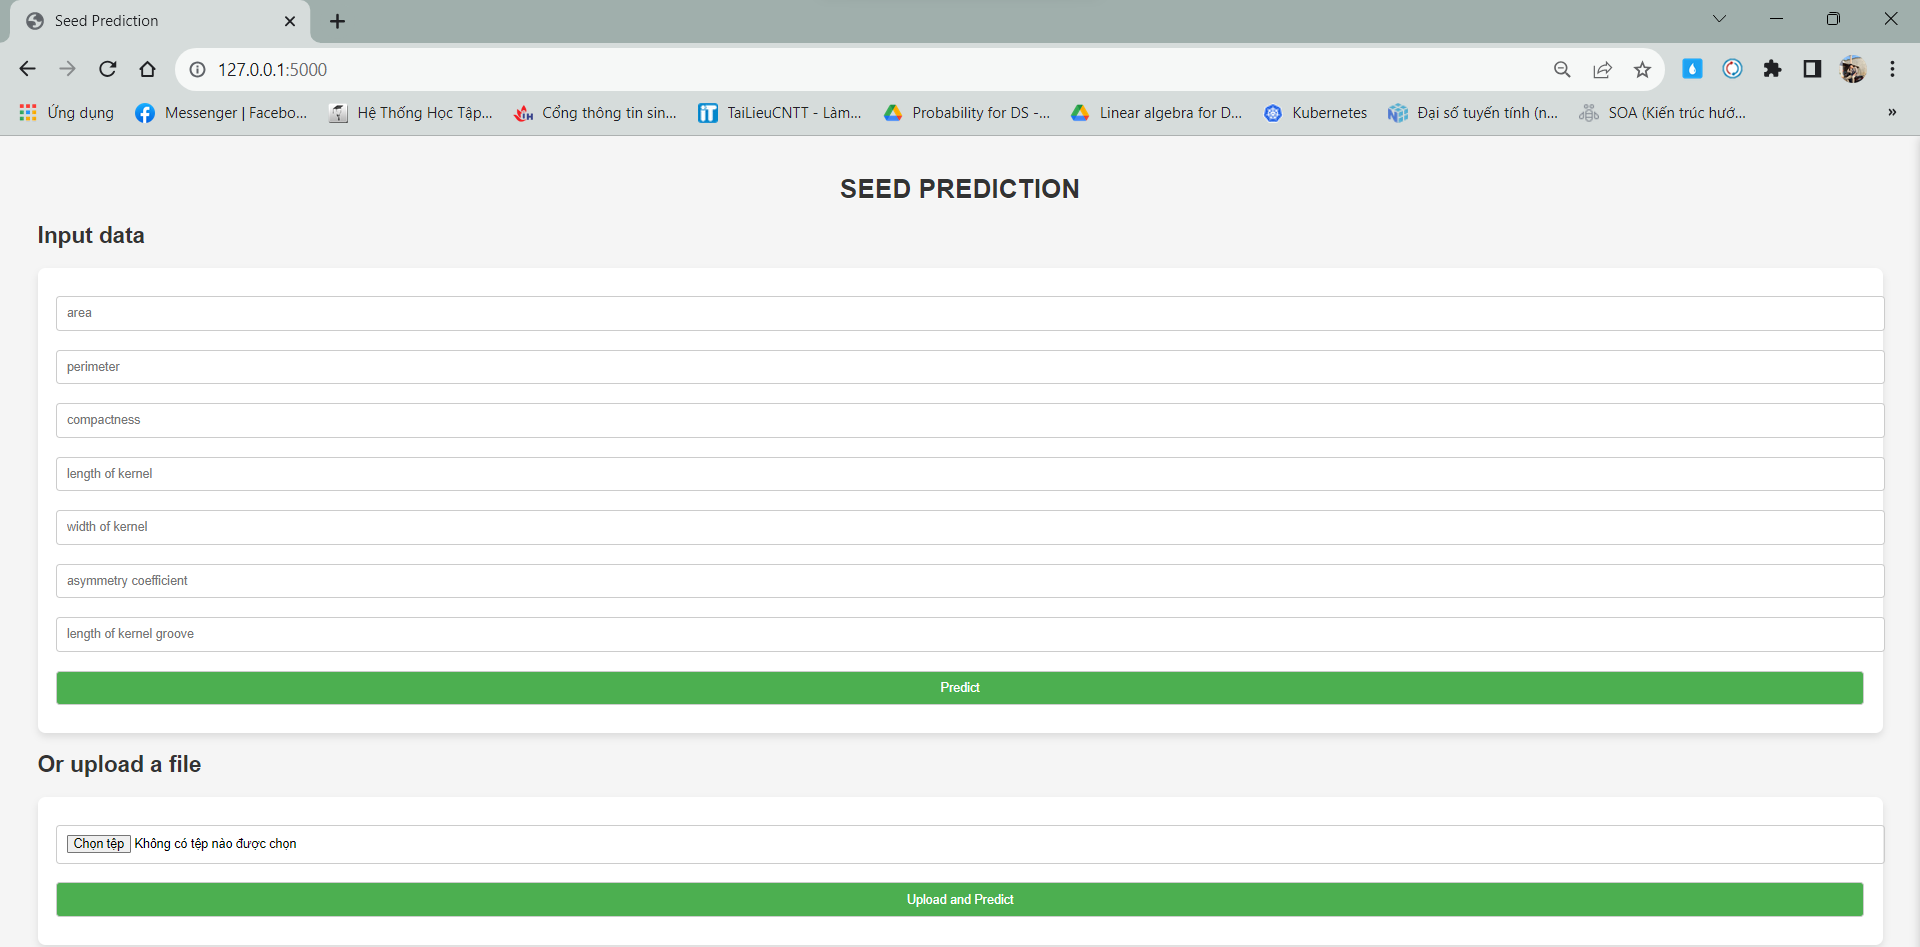
    - upload.html:
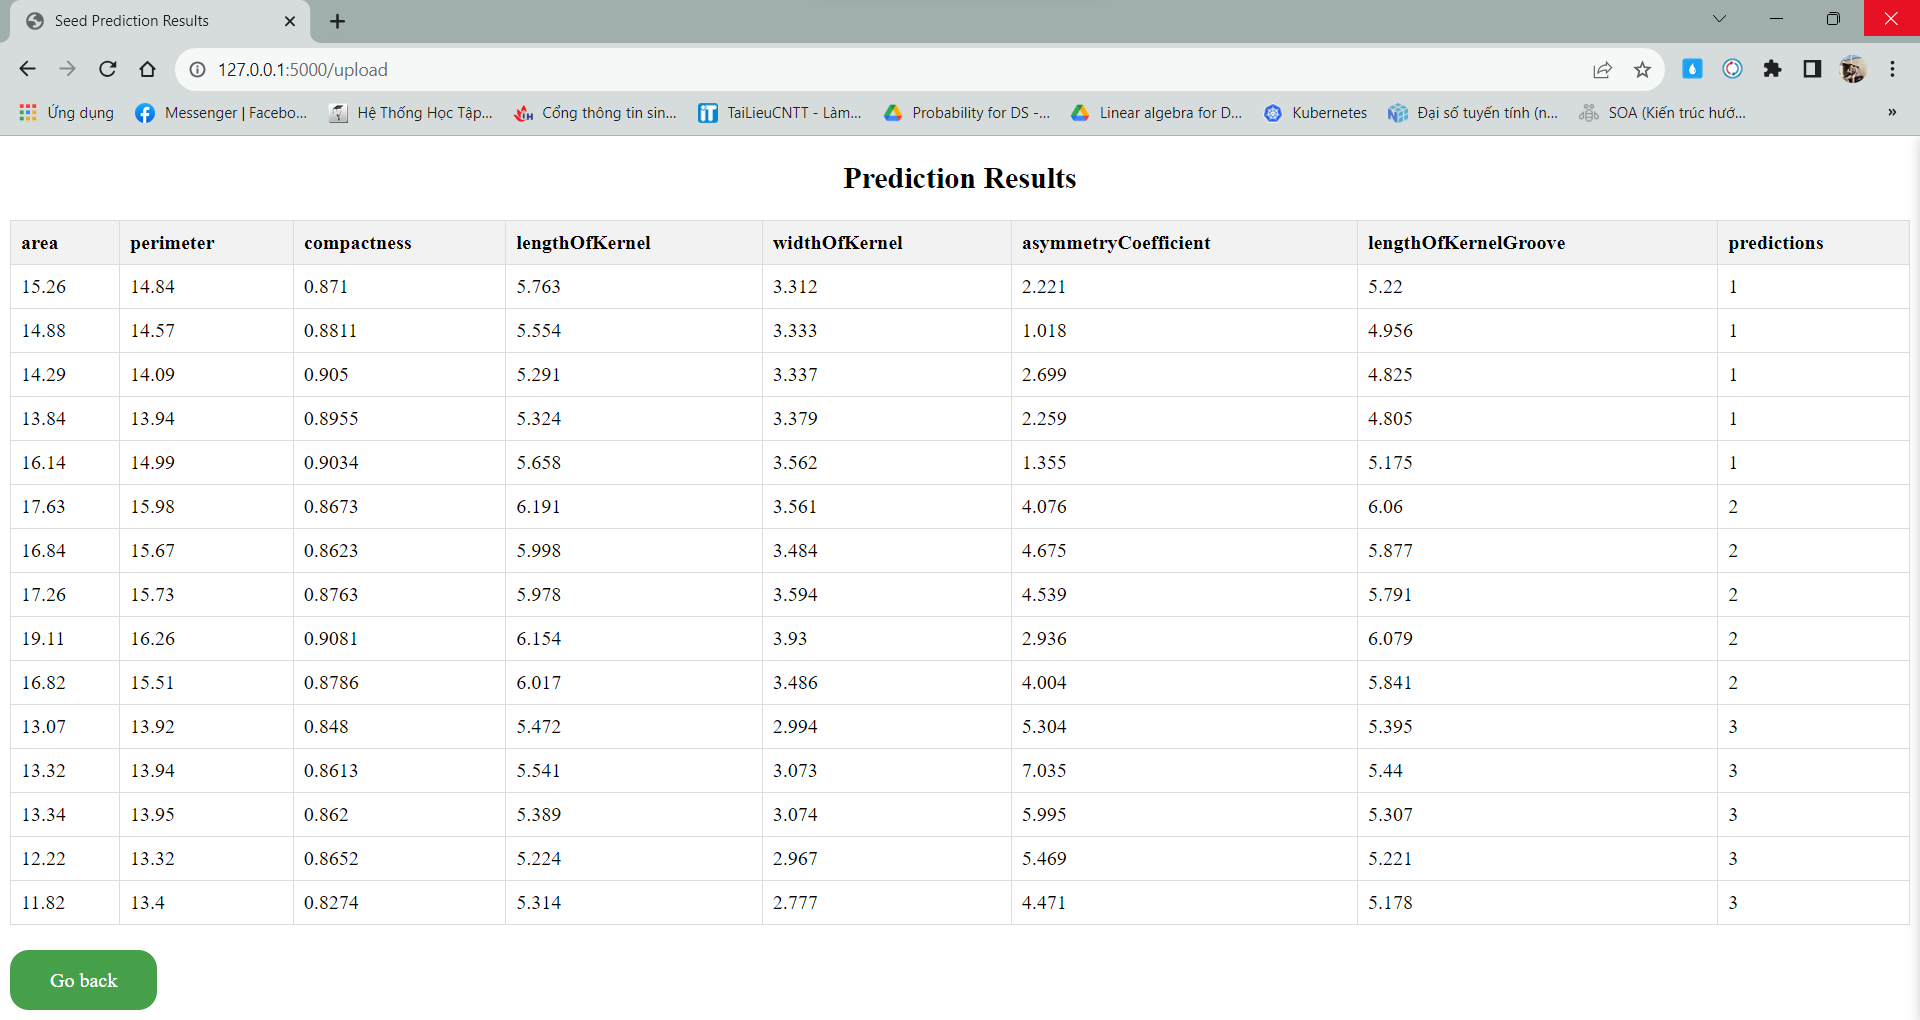